In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("d:\\jupyter\\breast cancer\\data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [34]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [35]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [36]:
df = df.drop(columns=['diagnosis'])  
df.corr(method='pearson')


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: ylabel='Frequency'>

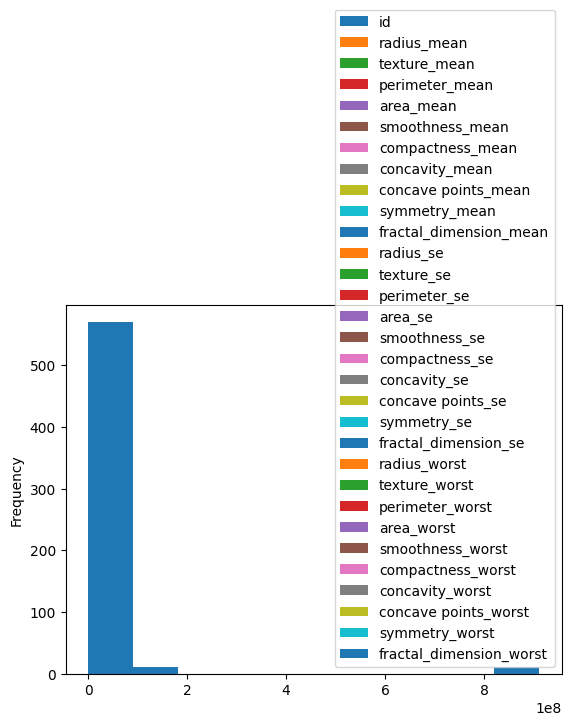

In [5]:
df.plot.hist()

id                            Axes(0.125,0.859189;0.0209459x0.0208108)
radius_mean                Axes(0.150135,0.859189;0.0209459x0.0208108)
texture_mean                Axes(0.17527,0.859189;0.0209459x0.0208108)
perimeter_mean             Axes(0.200405,0.859189;0.0209459x0.0208108)
area_mean                  Axes(0.225541,0.859189;0.0209459x0.0208108)
smoothness_mean            Axes(0.250676,0.859189;0.0209459x0.0208108)
compactness_mean           Axes(0.275811,0.859189;0.0209459x0.0208108)
concavity_mean             Axes(0.300946,0.859189;0.0209459x0.0208108)
concave points_mean        Axes(0.326081,0.859189;0.0209459x0.0208108)
symmetry_mean              Axes(0.351216,0.859189;0.0209459x0.0208108)
fractal_dimension_mean     Axes(0.376351,0.859189;0.0209459x0.0208108)
radius_se                  Axes(0.401486,0.859189;0.0209459x0.0208108)
texture_se                 Axes(0.426622,0.859189;0.0209459x0.0208108)
perimeter_se               Axes(0.451757,0.859189;0.0209459x0.0208108)
area_s

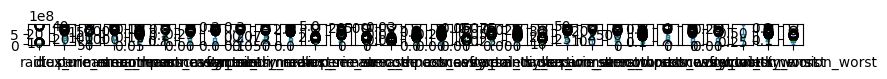

In [8]:
df.plot(kind='box',subplots=True,layout=(31,31),sharex=False, sharey=False,figsize=(10,10))


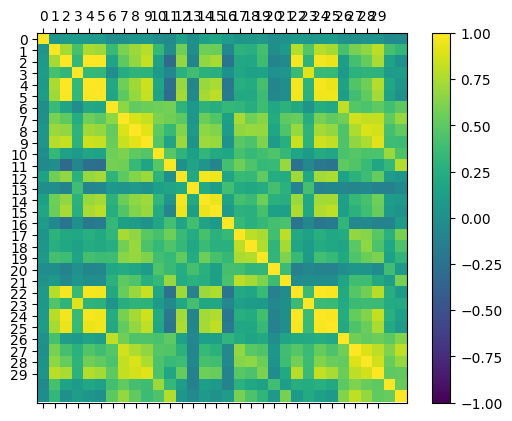

In [18]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
correlations =df.corr()
# plot correlation matrix

myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"

cax = axis.matshow(correlations, vmin =-1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 30, 1) # np.arange(start, stop, step); the interval does not include stop value

axis.set_xticks(ticks)
axis.set_yticks(ticks)

plt.show()

In [21]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

data = df.values
X = data[:,0:31]
Y = data[:,31]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:25,:])

[[9.329e-03 0.000e+00 2.887e-01 2.029e-01 2.891e-01 1.597e-01 4.954e-01
  3.301e-01 1.070e-01 1.546e-01 4.581e-01 3.823e-01 2.669e-02 8.564e-02
  2.950e-02 1.470e-02 8.104e-02 1.256e-01 4.288e-02 1.229e-01 1.252e-01
  5.287e-02 2.337e-01 2.257e-01 2.275e-01 1.094e-01 3.964e-01 2.429e-01
  1.510e-01 2.503e-01 3.191e-01]
 [9.330e-03 0.000e+00 1.194e-01 9.232e-02 1.144e-01 5.531e-02 4.493e-01
  1.397e-01 6.926e-02 1.032e-01 3.813e-01 4.021e-01 6.004e-02 1.363e-01
  5.428e-02 1.662e-02 2.683e-01 9.064e-02 5.013e-02 2.692e-01 1.743e-01
  7.163e-02 8.182e-02 9.701e-02 7.331e-02 3.188e-02 4.043e-01 8.490e-02
  7.082e-02 2.140e-01 1.745e-01]
 [9.330e-03 1.000e+00 3.956e-01 1.539e-01 4.057e-01 2.379e-01 4.935e-01
  5.954e-01 4.866e-01 4.849e-01 7.379e-01 4.288e-01 1.185e-01 7.722e-02
  1.238e-01 7.118e-02 1.726e-01 3.832e-01 1.628e-01 4.266e-01 4.058e-01
  1.209e-01 3.607e-01 1.882e-01 3.720e-01 1.956e-01 4.479e-01 5.512e-01
  5.036e-01 8.223e-01 6.115e-01]
 [9.249e-04 1.000e+00 6.711e-01 4.508

In [22]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

mydata_train=data[:,0:31]
mydata_label=data[:,31]
mydataScaler=Normalizer().fit(mydata_train)
mydataNormalized=mydataScaler.transform(mydata_train)
set_printoptions(precision=3)
print(mydataNormalized[20:25,:])

[[1.000e+00 0.000e+00 1.537e-06 1.846e-06 1.006e-05 6.110e-05 1.263e-08
  1.492e-08 5.367e-09 3.654e-09 2.311e-08 8.003e-09 2.176e-08 8.785e-08
  1.625e-07 1.724e-06 4.814e-10 2.230e-09 1.995e-09 7.626e-10 1.972e-09
  2.849e-10 1.704e-06 2.408e-06 1.129e-05 7.408e-05 1.542e-08 3.262e-08
  2.221e-08 8.558e-09 3.741e-08]
 [1.000e+00 0.000e+00 1.117e-06 1.462e-06 7.090e-06 3.218e-05 1.203e-08
  7.628e-09 3.473e-09 2.439e-09 2.133e-08 8.113e-09 3.258e-08 1.148e-07
  2.243e-07 1.845e-06 1.129e-09 1.683e-09 2.332e-09 1.670e-09 2.382e-09
  3.487e-10 1.202e-06 1.840e-06 7.653e-06 3.700e-05 1.556e-08 1.349e-08
  1.042e-08 7.317e-09 2.879e-08]
 [1.000e+00 1.175e-07 1.802e-06 1.675e-06 1.204e-05 8.276e-05 1.261e-08
  2.508e-08 2.440e-08 1.146e-08 2.962e-08 8.262e-09 5.156e-08 8.337e-08
  3.976e-07 5.277e-06 7.977e-10 6.260e-09 7.574e-09 2.646e-09 4.314e-09
  5.163e-10 2.123e-06 2.242e-06 1.470e-05 1.152e-04 1.633e-08 6.996e-08
  7.408e-08 2.812e-08 5.483e-08]
 [1.000e+00 1.174e-06 2.485e-05 2.706

In [23]:
from sklearn.preprocessing import Binarizer

mydata_train=data[:,0:31]
mydata_label=data[:,31]
mydataBinarizer=Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized=mydataBinarizer.transform(mydata_train)
set_printoptions(precision=3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]]


In [25]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data=df.values
mydata_train=data[:,0:31]
mydata_label=data[:,31]
#featureextraction
myFeature=SelectKBest(score_func=chi2,k=4) #kisnumberoftopfeaturestoselect
fit=myFeature.fit(mydata_train,mydata_label)
#summarizescores
set_printoptions(precision=3)
print(fit.scores_)

ValueError: Unknown label type: (array([0.119, 0.089, 0.088, 0.173, 0.077, 0.124, 0.084, 0.115, 0.107,
       0.207, 0.085, 0.105, 0.102, 0.063, 0.143, 0.134, 0.082, 0.114,
       0.076, 0.073, 0.082, 0.078, 0.099, 0.075, 0.096, 0.106, 0.128,
       0.074, 0.099, 0.079, 0.098, 0.14 , 0.085, 0.112, 0.123, 0.086,
       0.101, 0.062, 0.055, 0.107, 0.071, 0.096, 0.104, 0.103, 0.096,
       0.092, 0.074, 0.118, 0.083, 0.069, 0.066, 0.08 , 0.074, 0.08 ,
       0.079, 0.07 , 0.083, 0.109, 0.063, 0.09 , 0.08 , 0.077, 0.113,
       0.085, 0.103, 0.089, 0.092, 0.066, 0.117, 0.064, 0.066, 0.108,
       0.134, 0.103, 0.076, 0.064, 0.072, 0.111, 0.1  , 0.079, 0.089,
       0.102, 0.105, 0.092, 0.079, 0.086, 0.068, 0.093, 0.093, 0.085,
       0.072, 0.068, 0.062, 0.066, 0.082, 0.084, 0.074, 0.09 , 0.088,
       0.094, 0.074, 0.094, 0.069, 0.085, 0.076, 0.141, 0.091, 0.072,
       0.098, 0.088, 0.085, 0.085, 0.108, 0.09 , 0.102, 0.085, 0.077,
       0.106, 0.125, 0.061, 0.085, 0.085, 0.08 , 0.08 , 0.076, 0.072,
       0.079, 0.065, 0.078, 0.085, 0.092, 0.08 , 0.076, 0.071, 0.076,
       0.081, 0.073, 0.068, 0.071, 0.068, 0.082, 0.082, 0.081, 0.081,
       0.068, 0.104, 0.103, 0.092, 0.077, 0.07 , 0.064, 0.149, 0.126,
       0.068, 0.086, 0.081, 0.077, 0.06 , 0.079, 0.077, 0.08 , 0.063,
       0.092, 0.091, 0.092, 0.061, 0.077, 0.072, 0.093, 0.064, 0.068,
       0.074, 0.101, 0.073, 0.062, 0.078, 0.116, 0.095, 0.058, 0.073,
       0.081, 0.128, 0.086, 0.074, 0.098, 0.077, 0.069, 0.071, 0.066,
       0.063, 0.145, 0.069, 0.066, 0.12 , 0.087, 0.069, 0.093, 0.066,
       0.092, 0.101, 0.082, 0.079, 0.088, 0.109, 0.087, 0.097, 0.074,
       0.065, 0.108, 0.075, 0.059, 0.08 , 0.055, 0.068, 0.103, 0.106,
       0.084, 0.078, 0.083, 0.076, 0.087, 0.082, 0.088, 0.106, 0.076,
       0.061, 0.083, 0.084, 0.096, 0.124, 0.091, 0.071, 0.073, 0.083,
       0.082, 0.076, 0.087, 0.071, 0.078, 0.085, 0.065, 0.068, 0.13 ,
       0.063, 0.076, 0.077, 0.072, 0.118, 0.081, 0.078, 0.078, 0.065,
       0.13 , 0.081, 0.089, 0.08 , 0.101, 0.119, 0.102, 0.12 , 0.08 ,
       0.065, 0.075, 0.068, 0.076, 0.082, 0.076, 0.07 , 0.071, 0.087,
       0.061, 0.08 , 0.089, 0.082, 0.079, 0.06 , 0.064, 0.057, 0.063,
       0.069, 0.097, 0.067, 0.078, 0.106, 0.071, 0.064, 0.1  , 0.069,
       0.07 , 0.07 , 0.088, 0.085, 0.096, 0.07 , 0.069, 0.068, 0.066,
       0.069, 0.077, 0.068, 0.099, 0.078, 0.095, 0.078, 0.076, 0.067,
       0.084, 0.078, 0.062, 0.066, 0.07 , 0.057, 0.083, 0.074, 0.081,
       0.062, 0.06 , 0.082, 0.105, 0.059, 0.097, 0.059, 0.086, 0.102,
       0.08 , 0.069, 0.071, 0.07 , 0.082, 0.08 , 0.091, 0.092, 0.065,
       0.074, 0.072, 0.076, 0.101, 0.099, 0.077, 0.077, 0.088, 0.098,
       0.091, 0.079, 0.078, 0.085, 0.081, 0.082, 0.088, 0.076, 0.068,
       0.105, 0.088, 0.094, 0.07 , 0.072, 0.083, 0.071, 0.074, 0.081,
       0.055, 0.067, 0.072, 0.065, 0.076, 0.067, 0.076, 0.075, 0.065,
       0.086, 0.096, 0.068, 0.087, 0.071, 0.077, 0.09 , 0.12 , 0.071,
       0.096, 0.14 , 0.092, 0.073, 0.093, 0.112, 0.073, 0.068, 0.088,
       0.066, 0.104, 0.076, 0.077, 0.089, 0.102, 0.101, 0.071, 0.066,
       0.077, 0.071, 0.092, 0.081, 0.12 , 0.073, 0.072, 0.078, 0.06 ,
       0.077, 0.07 , 0.082, 0.085, 0.069, 0.077, 0.079, 0.092, 0.093,
       0.062, 0.074, 0.083, 0.105, 0.095, 0.071, 0.083, 0.092, 0.074,
       0.088, 0.08 , 0.081, 0.096, 0.077, 0.071, 0.06 , 0.116, 0.094,
       0.081, 0.083, 0.068, 0.105, 0.077, 0.072, 0.069, 0.067, 0.095,
       0.079, 0.068, 0.067, 0.082, 0.083, 0.091, 0.073, 0.075, 0.074,
       0.1  , 0.061, 0.082, 0.078, 0.073, 0.077, 0.072, 0.068, 0.063,
       0.072, 0.091, 0.074, 0.065, 0.079, 0.069, 0.125, 0.082, 0.079,
       0.122, 0.093, 0.085, 0.066, 0.083, 0.067, 0.108, 0.078, 0.079,
       0.077, 0.092, 0.091, 0.077, 0.076, 0.093, 0.07 , 0.082, 0.103,
       0.066, 0.09 , 0.08 , 0.076, 0.082, 0.059, 0.076, 0.07 , 0.074,
       0.066, 0.103, 0.077, 0.094, 0.09 , 0.085, 0.118, 0.075, 0.073,
       0.125, 0.136, 0.088, 0.117, 0.072, 0.107, 0.099, 0.061, 0.111,
       0.07 , 0.07 , 0.068, 0.079, 0.091, 0.089, 0.086, 0.09 , 0.097,
       0.076, 0.09 , 0.092, 0.105, 0.087, 0.076, 0.073, 0.081, 0.078,
       0.089, 0.078, 0.064, 0.083, 0.076, 0.084, 0.1  , 0.099, 0.107,
       0.081, 0.102, 0.07 , 0.064, 0.085, 0.07 , 0.074, 0.095, 0.079,
       0.076, 0.066, 0.08 , 0.065, 0.074, 0.072, 0.083, 0.067, 0.07 ,
       0.08 , 0.087, 0.083, 0.059, 0.141, 0.099, 0.071, 0.066, 0.078,
       0.124, 0.07 ]),)

In [31]:
from sklearn.decomposition import PCA

# featureextraction
pca=PCA(n_components=3)
fit=pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.000e+00 2.808e-11 4.673e-13]
[[ 1.000e+00  1.539e-10  2.104e-09  3.432e-09  1.422e-08  2.727e-07
  -1.459e-12  4.043e-14  3.193e-11  1.371e-11 -4.849e-12 -2.966e-12
   3.173e-10 -3.321e-11  2.221e-09  6.467e-08  2.324e-12  4.865e-12
   1.334e-11  3.888e-12 -1.144e-12  5.445e-13  3.186e-09  3.182e-09
   2.150e-08  4.881e-07  1.888e-12 -3.735e-12  3.872e-11  1.849e-11
  -2.188e-11]
 [-5.621e-07  5.354e-04  5.101e-03  2.153e-03  3.519e-02  5.172e-01
   4.314e-06  4.098e-05  8.222e-05  4.804e-05  7.254e-06 -2.592e-06
   3.109e-04 -6.517e-05  2.217e-03  5.506e-02 -8.613e-07  5.484e-06
   8.704e-06  3.238e-06 -1.232e-06 -9.734e-08  7.171e-03  3.038e-03
   4.958e-02  8.519e-01  6.454e-06  1.025e-04  1.701e-04  7.412e-05
   1.854e-05]
 [ 2.021e-08 -2.272e-04  9.258e-03 -2.791e-03  6.254e-02  8.516e-01
  -1.499e-05 -3.679e-06  7.460e-05  4.581e-05 -2.563e-05 -1.619e-05
  -4.700e-05  3.499e-04  8.680e-04  9.093e-03  1.623e-06  1.284e-05
   2.911e-05  9.462e-06  1.227e-05  

In [32]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print(selectedFeatures.shape)

(569, 1)


In [27]:
data = pd.read_csv('d:\\jupyter\\breast cancer\\data.csv') 

data = data.drop(['id'], axis=1)

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  

X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [28]:


model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("دقت مدل روی داده‌های تست:", test_accuracy)


Epoch 1/50


c:\Users\elahehba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5863 - loss: 21.2879 - val_accuracy: 0.7033 - val_loss: 2.3423
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.6828 - val_accuracy: 0.8791 - val_loss: 0.4283
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8615 - loss: 0.4265 - val_accuracy: 0.8901 - val_loss: 0.4403
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9059 - loss: 0.2970 - val_accuracy: 0.8242 - val_loss: 0.8287
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.7092 - val_accuracy: 0.8791 - val_loss: 0.3437
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9126 - loss: 0.2832 - val_accuracy: 0.8681 - val_loss: 0.5141
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8999 - loss: 0.3251 - val_accuracy: 0.8022 - val_loss: 0.8412
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.5689 - val_accuracy: 0.8791 - val_loss: 0.5649
E

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd


data = pd.read_csv("d:\\jupyter\\breast cancer\\data.csv")

X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].apply(lambda x: 1 if x == "M" else 0)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Apply k-NN
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9736842105263158

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.9824561403508771

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].apply(lambda x: 1 if x == "M" else 0)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# اعمال درخت تصمیم
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy :", accuracy_dt)

Accuracy : 0.956140350877193


In [ ]:
from sklearn.linear_model import LogisticRegression
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].apply(lambda x: 1 if x == "M" else 0)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# اعمال رگرسیون لجستیک
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Accuracy :", accuracy_log_reg)

Accuracy : 0.9912280701754386


In [ ]:
from sklearn.svm import SVC
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].apply(lambda x: 1 if x == "M" else 0) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# اعمال مدل SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)

Accuracy: 0.9912280701754386
